In [2]:
#La Potencia viene dada por la siguiente formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

Dónde:

P es la potencia necesaria

$\rho$ es la densidad del aire

V es la velocidad

wV es velocidad el viento

Cd es el coeficiente de drag

A es el área efectiva

Cr es el coeficiente de rozamiento

$\%$ es la pendiente

m es la masa total del conjunto bicicleta - ciclista

In [3]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np


### Cargamos los datos

In [7]:
path = '../Machine Learning/20180406_LEVS_195_90_R_E_ml_pca_clust.csv'

In [8]:
df = pd.read_csv(path)

In [11]:
df.head()

,Unnamed: 0,pwr,spd,porc,viento_aparente,k-means,gaussian
0,0,0.0,5.000000,0.000000,0.000000,2,1
1,1,0.0,5.141748,-11.731324,9.363222,2,1
2,2,0.0,5.200000,1.398533,9.817220,2,1
3,3,0.0,5.238999,-11.945909,9.986843,2,1
4,4,0.0,5.300000,-3.689984,9.813719,2,1


In [ ]:
# Hacemos que la target sea el pwr solo por ver como funciona el modelo. Luego habrá que despejar y calcular spd

In [13]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df_lm = df[['pwr','spd','porc','viento_aparente']]

In [52]:
train = round(len(df_lm)*0.7)
train
test = len(df_lm)-train
test

2276

In [55]:
df_lm_x = df[['spd','porc','viento_aparente']]
df_lm_y = df[['pwr']]

In [56]:
X_train = df_lm_x[:train]
X_test = df_lm_x[test:]

In [57]:
Y_train = df_lm_y[:train]
Y_test = df_lm_y[test:]

In [58]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [71]:
X_test.describe()

,spd,porc,viento_aparente
count,5310.000000,5310.000000,5310.000000
mean,9.233794,-0.233114,-1.258197
std,5.094377,6.394913,7.539719
min,0.000000,-34.371736,-10.000000
25%,4.000000,-4.604808,-8.643780
50%,8.960000,0.000000,-3.589588
75%,13.725951,3.385629,6.569324
max,22.700001,37.473409,10.000000


In [64]:
Y_test.describe()

,pwr
count,5310.000000
mean,135.287319
std,98.394710
min,0.000000
25%,0.112388
50%,156.410112
75%,219.632445
max,412.901105


Coefficients: 
 [[-9.07976819  4.68435149 -0.13854046]]
Mean squared error: 5451.71
Variance score: 0.44


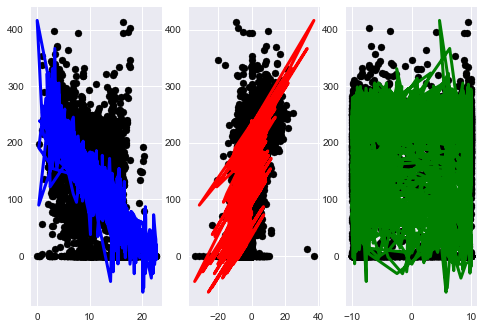

In [73]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.subplot(131)
plt.scatter(X_test['spd'], Y_test,  color='black')
plt.plot(X_test['spd'], Y_pred, color='blue', linewidth=3)
plt.grid(True)

plt.subplot(132)
plt.scatter(X_test['porc'], Y_test,  color='black')
plt.plot(X_test['porc'], Y_pred, color='red', linewidth=3)
plt.grid(True)

plt.subplot(133)
plt.scatter(X_test['viento_aparente'], Y_test,  color='black')
plt.plot(X_test['viento_aparente'], Y_pred, color='green', linewidth=3)
plt.grid(True)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [74]:
#Probamos otra cosa. Vamos a darle al modelo calculados los terminos de la formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

$P = \frac{\rho}{2}(V+wV)^2VCdA+CrmgV+\%mgV$

In [112]:
#añadimos aqui
#df_lm_x = df[['spd','porc','viento_aparente']]
#df_lm_y = df[['pwr']]

df_lm_x['termino_cda'] = (df_lm_x['spd']+df_lm_x['viento_aparente'])**2*df_lm_x['spd']
df_lm_x['termino_roz'] = df_lm_x['spd']*90
df_lm_x['termino_cte'] = df_lm_x['spd']*df_lm_x['porc']*90

In [113]:
df_lm_x.describe()

,spd,porc,viento_aparente,termino_roz,termino_cda,termino_cte
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,8.369993,0.566121,0.019477,753.299377,1656.010690,-1306.478042
std,4.609740,6.021843,7.389041,414.876627,3049.514249,5209.575737
min,0.000000,-34.371736,-10.000000,0.000000,0.000000,-47317.457777
25%,4.300000,-3.167782,-8.096809,387.000017,60.967664,-2925.517635
50%,7.700000,0.000000,0.265508,692.999983,435.095634,0.000000
75%,11.445358,4.621375,7.617296,1030.082177,1740.384350,1815.265832
max,22.700001,37.473409,10.000000,2043.000069,23032.248422,15924.144553


In [114]:
df_lm_x2 = df_lm_x[['termino_cda','termino_roz','termino_cte']]
df_lm_y2 = df_lm_y[['pwr']]

In [115]:
X_train2 = df_lm_x2[:train]
X_test2 = df_lm_x2[test:]

In [116]:
Y_train2 = df_lm_y2[:train]
Y_test2 = df_lm_y2[test:]

In [117]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
# Make predictions using the testing set
Y_pred2 = regr2.predict(X_test2)

In [119]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_pred2))



Coefficients: 
 [[ 0.00024874 -0.10717988  0.0050263 ]]
Mean squared error: 5702.72
Variance score: 0.41


### Ridge

In [121]:
rid = linear_model.Ridge(alpha=0.5)

In [122]:
rid.fit(X_train2,Y_train2)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [123]:
Y_predict_rid = rid.predict(X_test2)

In [124]:
# The coefficients
print('Coefficients: \n', rid.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid))

Coefficients: 
 [[ 0.00024874 -0.10717988  0.0050263 ]]
Mean squared error: 5702.72
Variance score: 0.41


In [131]:
rid2 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])

In [132]:
rid2.fit(X_train2,Y_train2)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [127]:
Y_predict_rid2 = rid.predict(X_test2)

In [128]:
# The coefficients
print('Coefficients: \n', rid2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid2))

Coefficients: 
 [[ 0.0002487  -0.10717988  0.00502633]]
Mean squared error: 5702.72
Variance score: 0.41
